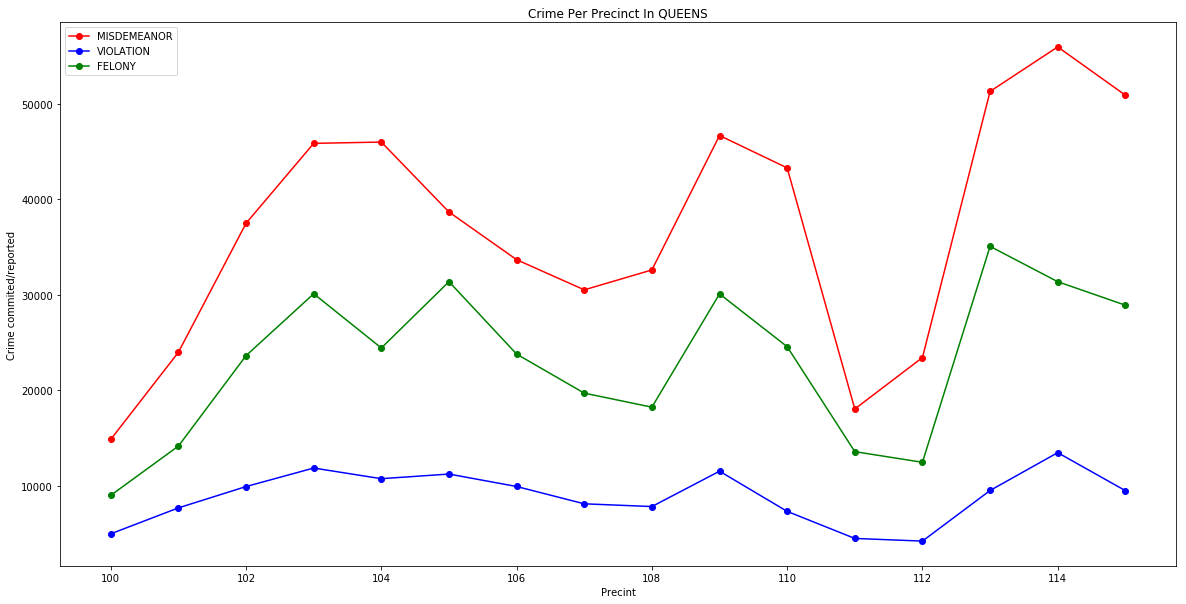

In [50]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

year=2010
borough='QUEENS'
def plotgraph(data):
       
    misdeamnor_dict={};
    violation_dict={};
    felony_dict={};
    misdeamnor_dict=data.get('MISDEMEANOR');
    violation_dict=data.get('VIOLATION');
    felony_dict=data.get('FELONY');
    lists_m = sorted(misdeamnor_dict.items()) # sorted by key, return a list of tuples
    lists_v = sorted(violation_dict.items())
    lists_f = sorted(felony_dict.items())
    precinct, frequency = zip(*lists_m) # unpack a list of pairs into two tuples
    precinctV, frequencyV = zip(*lists_v)
    precinctF, frequencyF = zip(*lists_f)
    
    #Plot data
    fig = plt.figure(figsize = (20,10))
    plt.title('Crime Per Precinct In '+borough)
    plt.ylabel('Crime commited/reported')
    plt.xlabel('Precint')
    plt.plot(precinct, frequency, marker='o',label='MISDEMEANOR',color='r',picker=5)
    plt.plot(precinctV, frequencyV, marker='o',label='VIOLATION',color='b',picker=5)
    plt.plot(precinctF, frequencyF, marker='o',label='FELONY',color='g',picker=5)
    plt.legend()
    fig.savefig("crime-plots-by-precinct/precinct_"+str(borough)+".png")
    plt.show()

with open("crime-data-by-precinct/"+str(borough)+"_precinct.out") as ins:
    crime_precinct_dict={}
    
    for line in ins:
        tuple=line.replace("(","").replace(')',"").split(',')
        precinct_freq_dict={}
        precinct=int(tuple[0])
        crime=tuple[1].replace("'","").strip()
        freq=int(tuple[2])
      
        if  crime in crime_precinct_dict:
            precinct_freq_dict = crime_precinct_dict.get(crime)  
            precinct_freq_dict[precinct]=freq
            crime_precinct_dict[crime]=precinct_freq_dict
        else:     
            precinct_freq_dict[precinct]=freq
            crime_precinct_dict[crime]=precinct_freq_dict
        
    #print(crime_precinct_dict)
    
    try:
        plotgraph(crime_precinct_dict)
    except Exception as e:
       print('Please pass the right Borough details !!!')
        